# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
%matplotlib inline

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import random
import math

random.seed(42)

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(mouse_metadata,study_results, on="Mouse ID")
merged_data.head()

# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
len(merged_data["Mouse ID"].unique())

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = merged_data[merged_data.duplicated(subset=['Mouse ID', 'Timepoint'])]
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_data.drop_duplicates()
clean_df.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [7]:
# Checking the number of mice in the clean DataFrame.
num_mice = len(clean_df["Mouse ID"].unique())


## Summary Statistics

Filter by drug regimen

In [8]:
len(clean_df["Drug Regimen"].unique())
drugs = clean_df["Drug Regimen"].unique()

# using a for loop to count the number of rows for each drug, stored in counts
counts = []
for drug in drugs:
    count = (clean_df['Drug Regimen'] == drug).sum()
    counts.append(count)
counts

[228, 230, 178, 181, 178, 181, 182, 188, 160, 186]

In [9]:
only_capomulin = clean_df.loc[clean_df["Drug Regimen"]=="Capomulin",:]
only_ramicane = clean_df.loc[clean_df["Drug Regimen"]=="Ramicane",:]
only_infubinol= clean_df.loc[clean_df["Drug Regimen"]=="Infubinol",:]
only_ceftamin = clean_df.loc[clean_df["Drug Regimen"]=="Ceftamin",:]

mean_cap = np.mean(only_capomulin["Tumor Volume (mm3)"])
median_cap = np.median(only_capomulin["Tumor Volume (mm3)"])
var_cap = np.var(only_capomulin['Tumor Volume (mm3)'])
std_cap = np.std(only_capomulin['Tumor Volume (mm3)'])

cap_sample = only_capomulin.sample(30)
std_cap_sample = np.std(cap_sample['Tumor Volume (mm3)'])
square_root = math.sqrt(30)

sem_cap_sample =std_cap_sample/square_root
print(f"The SEM value for the sample tumor volume data is {sem_cap_sample}")

mean_inf = np.mean(only_infubinol["Tumor Volume (mm3)"])
median_inf = np.median(only_infubinol["Tumor Volume (mm3)"])
var_inf = np.var(only_infubinol['Tumor Volume (mm3)'])
std_inf = np.std(only_infubinol['Tumor Volume (mm3)'])

inf_sample = only_infubinol.sample(30)
std_inf_sample = np.std(inf_sample['Tumor Volume (mm3)'])
square_root = math.sqrt(30)

sem_inf_sample =std_inf_sample/square_root
print(f"The SEM value for the sample tumor volume data is {sem_inf_sample}")

mean_ram = np.mean(only_ramicane["Tumor Volume (mm3)"])
median_ram = np.median(only_ramicane["Tumor Volume (mm3)"])
var_ram = np.var(only_ramicane['Tumor Volume (mm3)'])
std_ram = np.std(only_ramicane['Tumor Volume (mm3)'])

ram_sample = only_ramicane.sample(30)
std_ram_sample = np.std(ram_sample['Tumor Volume (mm3)'])
square_root = math.sqrt(30)

sem_ram_sample =std_ram_sample/square_root
print(f"The SEM value for the sample tumor volume data is {sem_ram_sample}")

mean_cef = np.mean(only_ceftamin["Tumor Volume (mm3)"])
median_cef = np.median(only_ceftamin["Tumor Volume (mm3)"])
var_cef = np.var(only_ceftamin['Tumor Volume (mm3)'])
std_cef = np.std(only_ceftamin['Tumor Volume (mm3)'])

cef_sample = only_ceftamin.sample(30)
std_cef_sample = np.std(cef_sample['Tumor Volume (mm3)'])
square_root = math.sqrt(30)

sem_cef_sample =std_cef_sample/square_root
print(f"The SEM value for the sample tumor volume data is {sem_cef_sample}")


The SEM value for the sample tumor volume data is 0.8492458073843486
The SEM value for the sample tumor volume data is 1.199070316631455
The SEM value for the sample tumor volume data is 0.8497528265984613
The SEM value for the sample tumor volume data is 1.0721804251675746


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats = pd.DataFrame({"Drug Regimen":['Capomuin','Ramicane','Infubinol','Ceftamin'],"mean":[mean_cap,mean_ram,mean_inf,mean_cef],"median":[median_cap,median_ram,median_inf,median_cef],"variance":[var_cap,var_ram,var_inf,var_cef],"standard deviation":[std_cap,std_ram,std_inf,std_cef],"Standard Error":[sem_cap_sample,sem_ram_sample,sem_inf_sample,sem_cef_sample]})
summary_stats


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


,Drug Regimen,mean,median,variance,standard deviation,Standard Error
0,Capomuin,40.675741,41.557809,24.839296,4.983904,0.849246
1,Ramicane,40.216745,40.673236,23.383692,4.835669,0.849753
2,Infubinol,52.884795,51.820584,42.886388,6.548770,1.199070
3,Ceftamin,52.591172,51.776157,39.069446,6.250556,1.072180


In [11]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

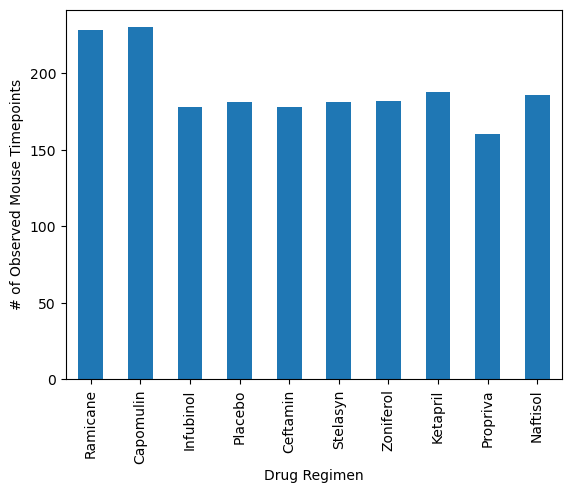

In [12]:
# make a dataframe from the 2 arrays
data_count_df = pd.DataFrame({'Drug Regimen': drugs, 'Count': counts})

# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

data_count_df.plot.bar('Drug Regimen', 'Count', rot=90, legend = False)

# Add labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

# Display the plot
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

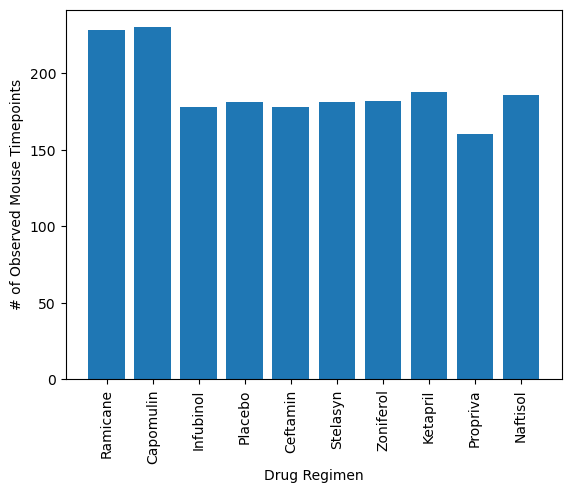

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(drugs,counts)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation='vertical')
plt.show


In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

#filter by gender and count
sex_types = clean_df["Sex"].unique()

# using a for loop to count the number of rows for each gender, stored in sex_num
sex_num = []
for sex_type in sex_types:
    num = (clean_df['Sex'] == sex_type).sum()
    sex_num.append(num)
sex_num

sex_count_df = pd.DataFrame({"Sex": sex_types,"Number":sex_num})
total_male = sex_count_df.iloc[0,1] 
total_female = sex_count_df.iloc[1,1]
total_sex = total_male + total_female

sex_count_df["Percent"]=sex_count_df["Number"]/total_sex *100
sex_count_df

,Sex,Number,Percent
0,Male,958,50.634249
1,Female,934,49.365751


<function matplotlib.pyplot.show(close=None, block=None)>

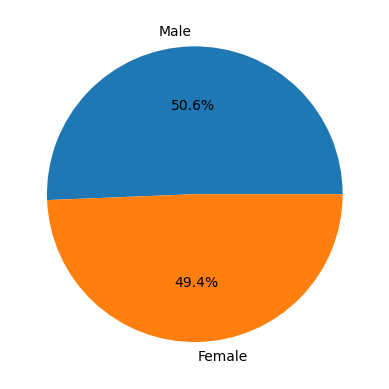

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Male', 'Female']

plt.pie(sex_count_df['Percent'],labels=labels, autopct = '%1.1f%%')
plt.show

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin



# only_four = clean_df.loc[(clean_df["Drug Regimen"]=="Capomulin")|(clean_df["Drug Regimen"]=="Ramican")|(clean_df["Drug Regimen"]=="Infubinol")|(clean_df["Drug Regimen"]=="Ceftamin"),:]

# Start by getting the last (greatest) timepoint for each mouse
cap_mice = only_capomulin.groupby('Mouse ID')
cap_last_rows = cap_mice.last()

ram_mice = only_ramicane.groupby('Mouse ID')
ram_last_rows = ram_mice.last()

inf_mice = only_infubinol.groupby('Mouse ID')
inf_last_rows = inf_mice.last()

cef_mice = only_ceftamin.groupby('Mouse ID')
cef_last_rows = cef_mice.last()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
cap_tumor_vol = []
cap_tumor_vol = cap_last_rows['Tumor Volume (mm3)'].tolist()

cap_quartiles = np.quantile(cap_tumor_vol,[.25,.5,.75])

ram_tumor_vol = []
ram_tumor_vol = ram_last_rows['Tumor Volume (mm3)'].tolist()

ram_quartiles = np.quantile(ram_tumor_vol,[.25,.5,.75])

inf_tumor_vol = []
inf_tumor_vol = inf_last_rows['Tumor Volume (mm3)'].tolist()

inf_quartiles = np.quantile(inf_tumor_vol,[.25,.5,.75])

cef_tumor_vol = []
cef_tumor_vol = cef_last_rows['Tumor Volume (mm3)'].tolist()

cef_quartiles = np.quantile(cef_tumor_vol,[.25,.5,.75])

print(cap_quartiles)
print(inf_quartiles)
print(ram_quartiles)
print(cef_quartiles)

[32.37735684 38.1251644  40.1592203 ]
[54.04860769 60.16518046 65.52574285]
[31.56046955 36.56165229 40.65900627]
[48.72207785 59.85195552 64.29983003]


In [18]:

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

cap_lowerq = cap_quartiles[0]
cap_upperq = cap_quartiles[2]
cap_iqr = cap_upperq-cap_lowerq

cef_lowerq = cef_quartiles[0]
cef_upperq = cef_quartiles[2]
cef_iqr = cef_upperq-cef_lowerq

ram_lowerq = ram_quartiles[0]
ram_upperq = ram_quartiles[2]
ram_iqr = ram_upperq-ram_lowerq

inf_lowerq = inf_quartiles[0]
inf_upperq = inf_quartiles[2]
inf_iqr = inf_upperq-inf_lowerq

cap_iqr
    # Locate the rows which contain mice on each drug and get the tumor volumes

    # add subset 
    
    # Determine outliers using upper and lower bounds
cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)
print(f"Values below {cap_lower_bound} could be outliers for cap.")
print(f"Values above {cap_upper_bound} could be outliers for cap.")
cap_tumor_vol.sort()
print(cap_tumor_vol)

inf_lower_bound = inf_lowerq - (1.5*inf_iqr)
inf_upper_bound = inf_upperq + (1.5*inf_iqr)
print(f"Values below {inf_lower_bound} could be outliers for inf.")
print(f"Values above {inf_upper_bound} could be outliers for inf.")
inf_tumor_vol.sort()
print(inf_tumor_vol)

ram_lower_bound = ram_lowerq - (1.5*ram_iqr)
ram_upper_bound = ram_upperq + (1.5*ram_iqr)
print(f"Values below {ram_lower_bound} could be outliers for ram.")
print(f"Values above {ram_upper_bound} could be outliers for ram.")
ram_tumor_vol.sort()
print(ram_tumor_vol)

cef_lower_bound = cef_lowerq - (1.5*cef_iqr)
cef_upper_bound = cef_upperq + (1.5*cef_iqr)
print(f"Values below {cef_lower_bound} could be outliers for cef.")
print(f"Values above {cef_upper_bound} could be outliers for cef.")
cef_tumor_vol.sort()
print(cef_tumor_vol)


Values below 20.70456164999999 could be outliers for cap.
Values above 51.83201549 could be outliers for cap.
[23.34359787, 28.43096411, 28.48403281, 30.48598484, 31.02392294, 31.8962384, 32.37735684, 33.32909778, 34.45529799, 36.04104736, 37.07402422, 37.31184577, 38.1251644, 38.75326548, 38.84687569, 38.93963263, 38.98287774, 39.95234669, 40.1592203, 40.65812366, 40.72857787, 41.48300765, 41.58152074, 46.53920617, 47.68596303]
Values below 36.83290494999999 could be outliers for inf.
Values above 82.74144559000001 could be outliers for inf.
[36.3213458, 45.69933088, 46.25011212, 47.01036401, 50.00513807, 51.54243058, 54.04860769, 54.65654872, 55.62942846, 55.65068132, 57.03186187, 58.26844248, 60.16518046, 60.91876652, 60.96971133, 62.11727887, 62.43540402, 62.75445141, 65.52574285, 66.08306589, 66.19691151, 67.28962147, 67.68556862, 67.97341878, 72.2267309]
Values below 17.912664470000003 could be outliers for ram.
Values above 54.30681135 could be outliers for ram.
[22.05012627, 29

no outliers found

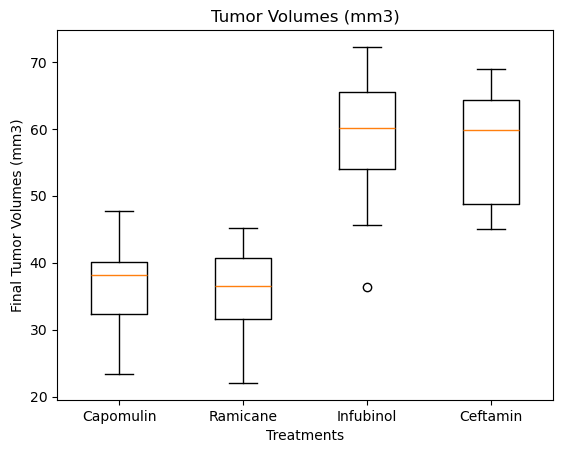

In [19]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volumes (mm3)')

ax1.boxplot([cap_tumor_vol, ram_tumor_vol, inf_tumor_vol,cef_tumor_vol])
plt.xlabel('Treatments')

ax1.set_ylabel('Final Tumor Volumes (mm3)')
ax1.set_xticklabels(treatments)

plt.show()

## Line and Scatter Plots

In [20]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mousek403 = only_ramicane.loc[only_ramicane["Mouse ID"]=='k403']

mousek403

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


<function matplotlib.pyplot.show(close=None, block=None)>

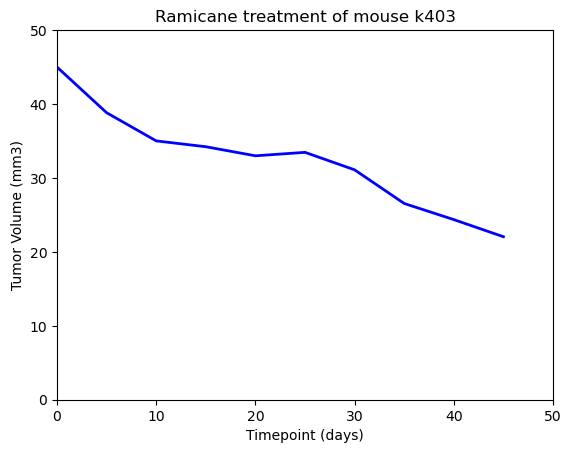

In [21]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

xaxis = mousek403['Timepoint']
yaxis = mousek403['Tumor Volume (mm3)']

plt.plot(xaxis,yaxis,linewidth = 2, color = 'blue')
plt.title('Ramicane treatment of mouse k403')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.xlim(0,50)
plt.ylim(0,50)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

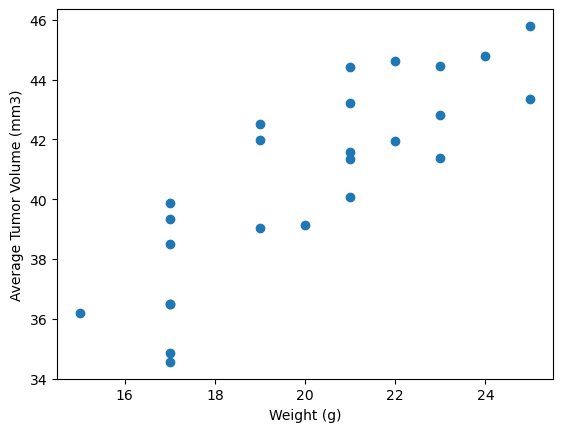

In [22]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

only_capomulin.head()

avg_tum_vol = pd.DataFrame(cap_mice[["Weight (g)","Tumor Volume (mm3)"]].mean())

weight = avg_tum_vol["Weight (g)"]
average_tum_vol = avg_tum_vol["Tumor Volume (mm3)"]
plt.scatter(weight,average_tum_vol)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show

## Correlation and Regression

The correlation between mouse weight and tumor volume is  0.8419363424694721


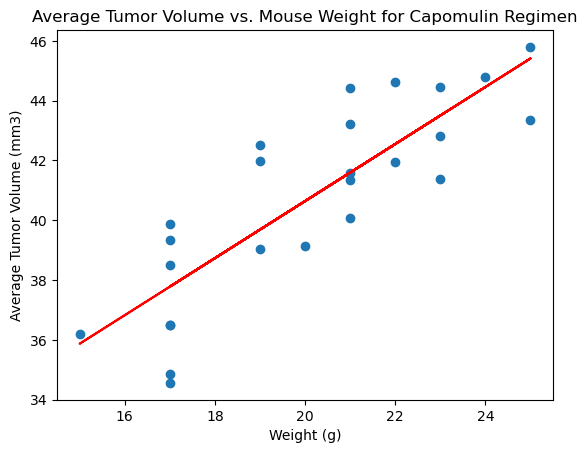

In [23]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

tv_slope, tv_int, tv_r, tv_p, tv_std_err = st.linregress(weight, average_tum_vol)

tv_fit = tv_slope * weight + tv_int

plt.scatter(weight,average_tum_vol)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.plot(weight,tv_fit,"-", color = 'red')
plt.title('Average Tumor Volume vs. Mouse Weight for Capomulin Regimen')
plt.show

print(f'The correlation between mouse weight and tumor volume is ',tv_r)

In [29]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

print(f'The correlation between mouse weight and tumor volume is ',tv_r)
print(f'The linear model is:   Tumor Volume = ', tv_slope, 'x weight  + ', tv_int)

The correlation between mouse weight and tumor volume is  0.8419363424694721
The linear model is:   Tumor Volume =  0.9544396890241048 x weight  +  21.552160532685008
